In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv(
    'data/btc-eth-prices-outliers.csv',
     index_col=0,
     parse_dates=True)

In [5]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

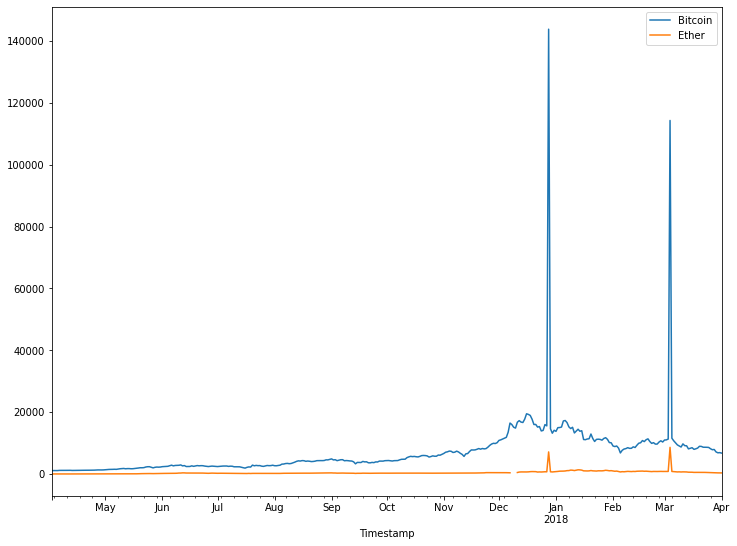

In [6]:
df.plot(figsize=(12,9))

In [5]:
find missing data

SyntaxError: invalid syntax (<ipython-input-5-15ac9af7b204>, line 1)

<AxesSubplot:xlabel='Timestamp'>

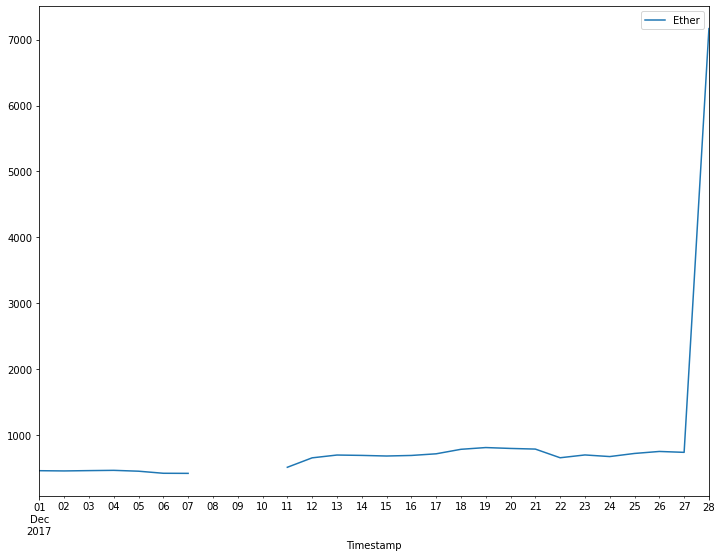

In [7]:
df.loc['2017-12':'2017-12-28'].plot(y='Ether', figsize=(12,9))

<AxesSubplot:xlabel='Timestamp'>

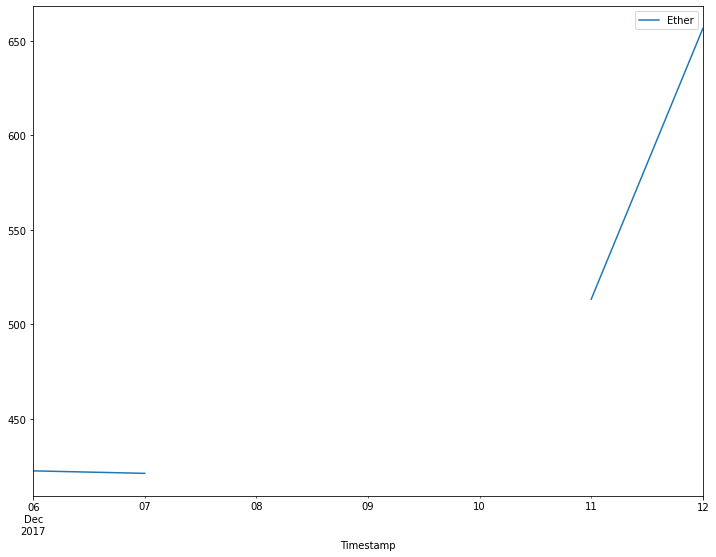

In [8]:
df.loc['2017-12-06':'2017-12-12'].plot(y='Ether', figsize=(12,9))

In [10]:
df_na=df.loc['2017-12-06':'2017-12-12']

In [11]:
df_na['Ether'].isna().values.any()

True

In [12]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [15]:
df.loc['2017-12-06':'2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [33]:
df.fillna(method='bfill', inplace=True)

<AxesSubplot:xlabel='Timestamp'>

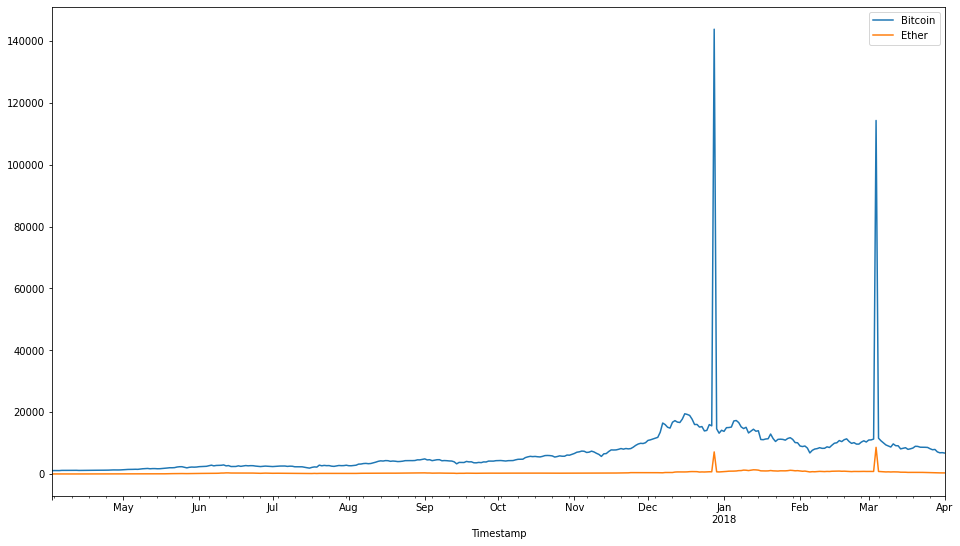

In [34]:
df.plot(figsize=(16,9))

In [2]:
#fix spikes
df['2017-12-20':'2018-01-02'].plot()

NameError: name 'df' is not defined

<AxesSubplot:xlabel='Timestamp'>

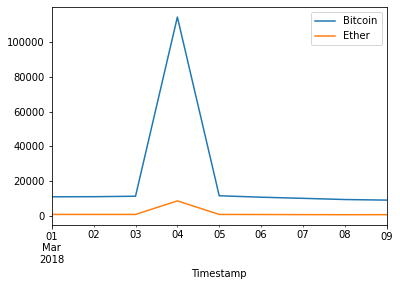

In [27]:
df['2018-03-01':'2018-03-09'].plot()

In [10]:
df_cleaned=df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

<AxesSubplot:xlabel='Timestamp'>

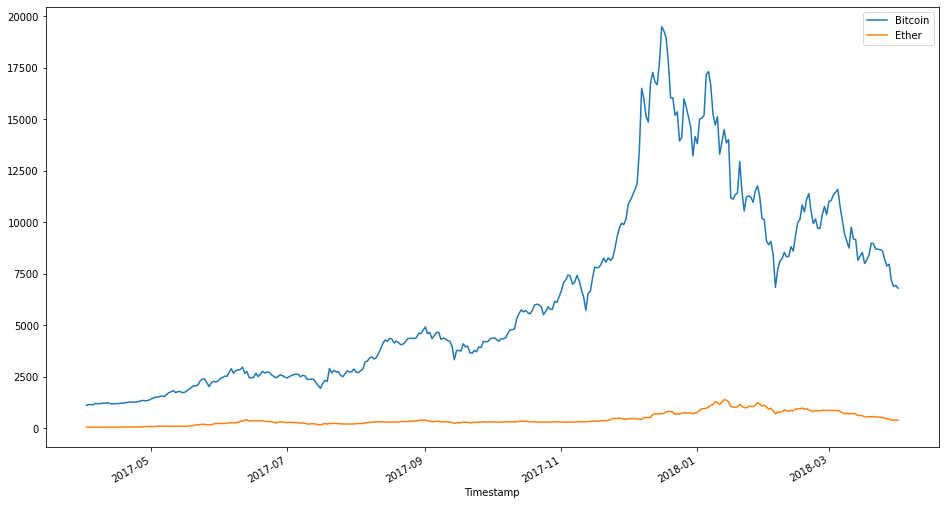

In [29]:
df_cleaned.plot(figsize=(16,9))

In [30]:
find central tendency

SyntaxError: invalid syntax (<ipython-input-30-520a83f75802>, line 1)

In [31]:
#mean
# mean of invaild values
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [32]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

median

In [34]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

mode

In [36]:
df.mode()#but this doesnt make much sense to measure the modeas we have continuous value....

,Bitcoin,Ether
0,1099.169125,513.29
1,1133.079314,NaN
2,1141.600363,NaN
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
360,18961.856667,NaN
361,19289.785000,NaN
362,19498.683333,NaN
363,114301.816667,NaN


Visualizing distribution

<AxesSubplot:ylabel='Frequency'>

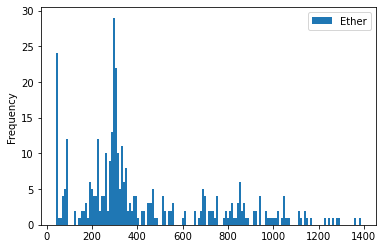

In [39]:
#histograms
df_cleaned.plot(kind='hist', y='Ether', bins=150)

<AxesSubplot:ylabel='Frequency'>

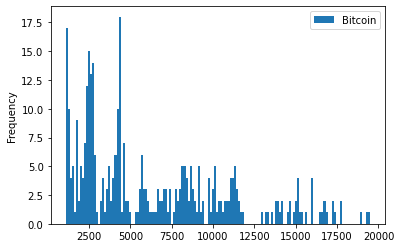

In [40]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

By seaborn

c:\users\ann's xps\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ether', ylabel='Density'>

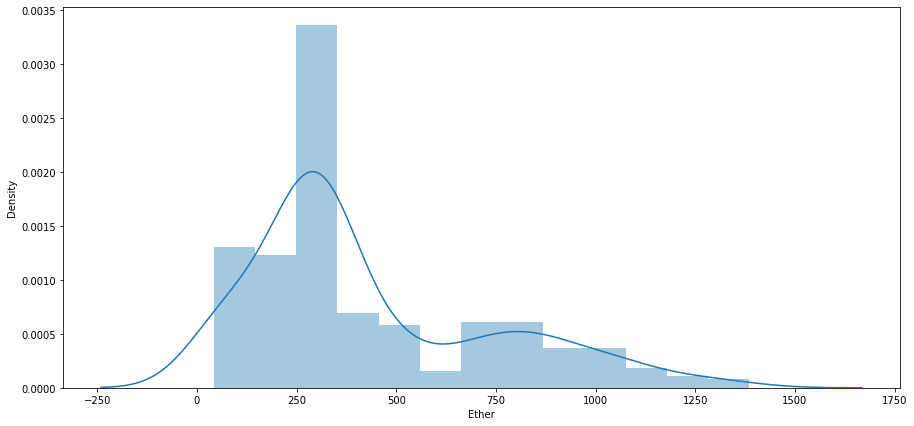

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Ether'], ax=ax)

c:\users\ann's xps\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ann's xps\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

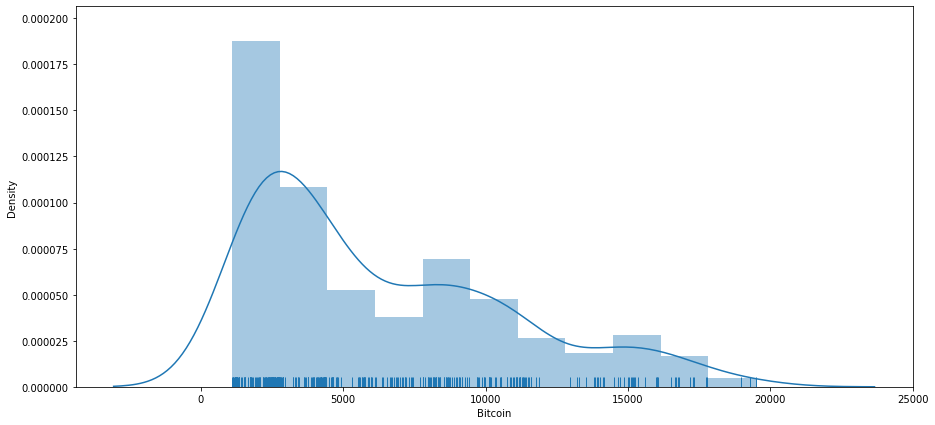

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)
#distplot is a general method that will plot a histogram, a KDE and a rugplot.

<AxesSubplot:xlabel='Ether', ylabel='Density'>

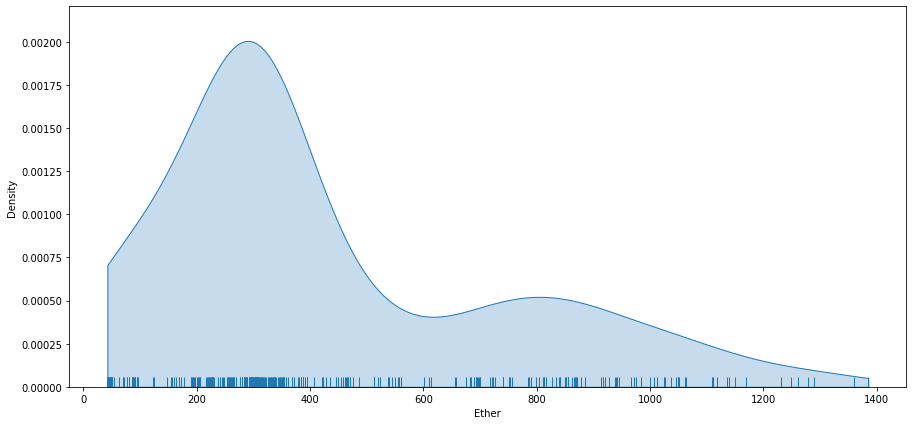

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax)

<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

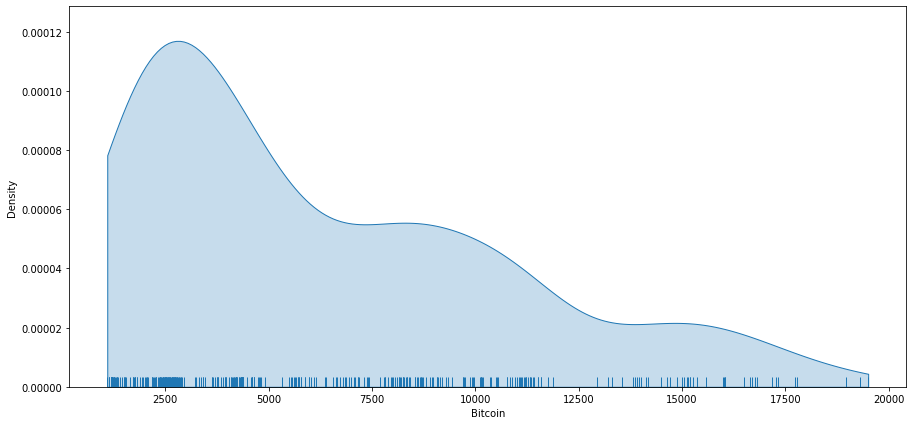

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
sns.kdeplot(df_cleaned['Bitcoin'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Bitcoin'],ax=ax)

c:\users\ann's xps\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

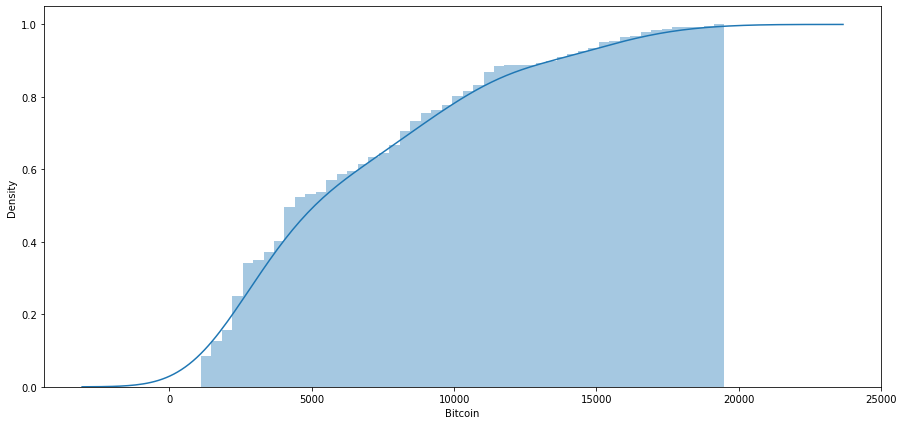

In [54]:
#cumulative plot
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True))

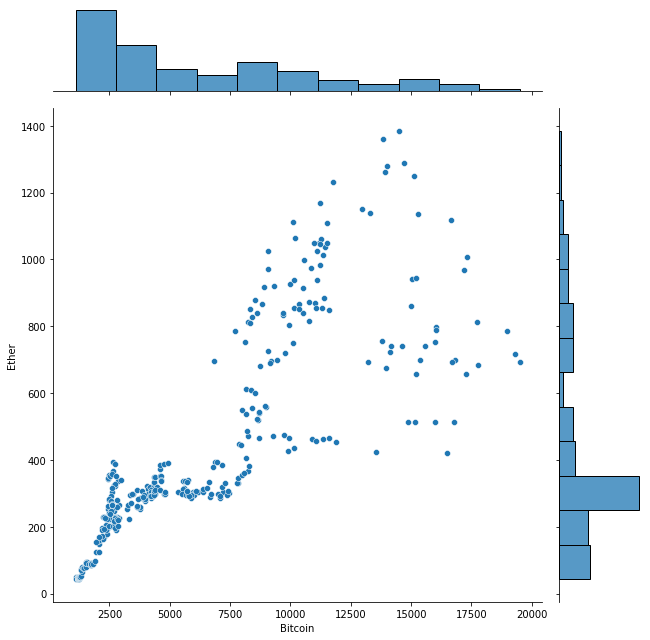

In [59]:
sns.jointplot(x='Bitcoin', y='Ether', data=df_cleaned, height=9)

<AxesSubplot:xlabel='Bitcoin', ylabel='Ether'>

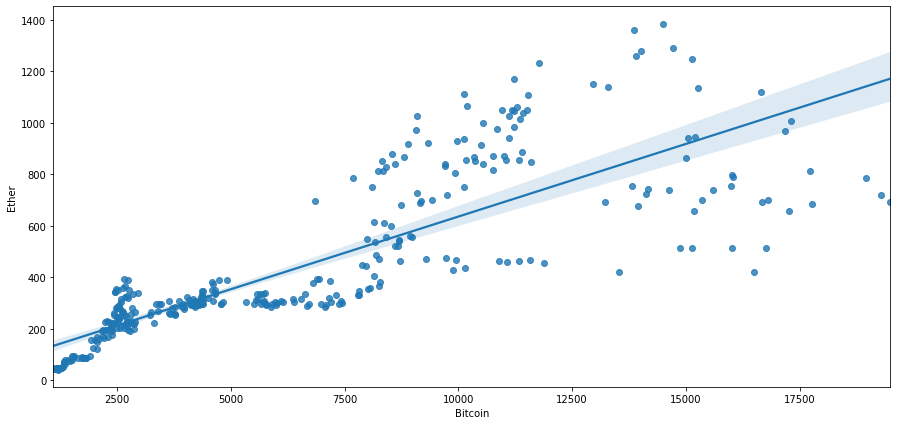

In [60]:
fig, ax=plt.subplots(figsize=(15,7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

### Dispersion

In [8]:
#Range
df['Bitcoin'].max() - df['Bitcoin'].min()
#this range is very high. Might indicate the presence of outliners or invalid values.

142706.6475416667

In [13]:
df_cleaned['Bitcoin'].max() - df['Bitcoin'].min()
#this value makes more sense since the high of bitcoin is about 20K

18399.51420833333

### Variance and standard deviation

In [14]:
df['Bitcoin'].var()

103766537.75278121

In [15]:
df['Bitcoin'].std()

10186.586167739475

since both variance and std are sensible to outliers, so better check with cleaned dataset.

In [16]:
df_cleaned['Bitcoin'].var()

20374008.236050833

In [17]:
df_cleaned['Bitcoin'].std()

4513.757662530282

### IQR(interquartile range/midspeard) is Q3 - Q1

In [18]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [19]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

*****so we can see that IQR is more robust than std or range, because it is not so sensitive to outliers.

### Analytical analysis of invaild values



##### Using 'std' : Z scores

Can now define those values that are couple of Z scores above or below the mean(or the max/min value).

In [20]:
upper_limit = df['Bitcoin'].mean() + 2*df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2*df['Bitcoin'].std()

In [21]:
print("Upper Limit : {}".format(upper_limit))
print("Lower Limit : {}".format(lower_limit))

Upper Limit : 27369.17635730169
Lower Limit : -13377.16831365621


c:\users\ann's xps\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


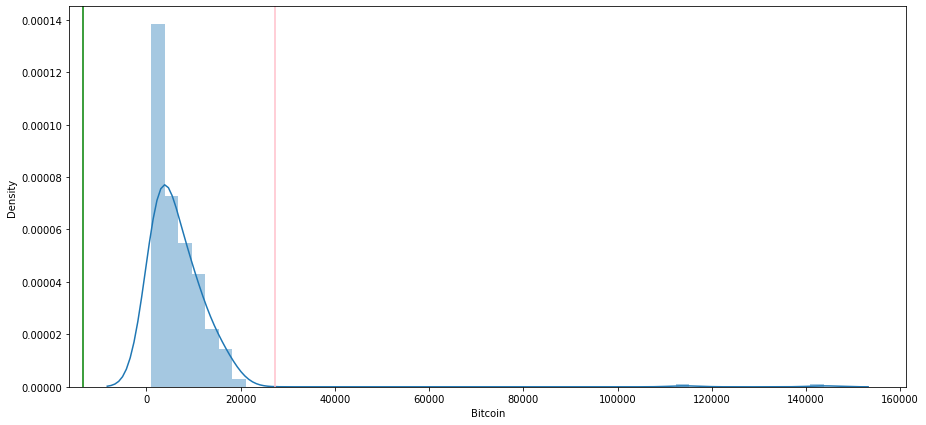

In [22]:
fig, ax=plt.subplots(figsize=(15,7))
sns.distplot(df['Bitcoin'],ax=ax)
ax.axvline(lower_limit, color='green')
ax.axvline(upper_limit, color='pink')

##### lower limit does not make a lot of sense, as negtive values are invaild. But the upper limit has a good measure. Anything above $27,369 is considered to be an invaild value.

### Using IQR

In [24]:
#using IQR since std might be too affected by outliers/invalid values.
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [25]:
upper_limit = df['Bitcoin'].mean() + 2*iqr
lower_limit = df['Bitcoin'].mean() - 2*iqr

In [26]:
print("Upper limit :{}".format(upper_limit))
print("Lower Limit :{}".format(lower_limit))

Upper limit :20190.992317060834
Lower Limit :-6198.9842734153535


c:\users\ann's xps\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


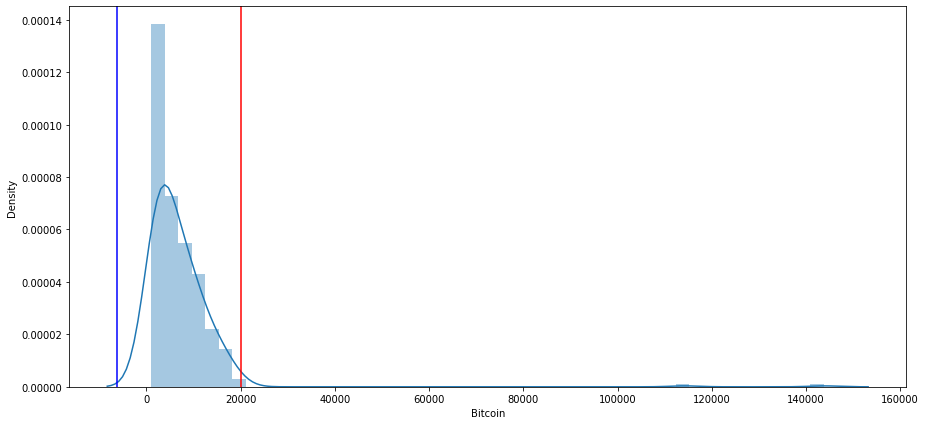

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='blue')
ax.axvline(upper_limit, color='red')

### Cleaning invalid vlaues analytically

remove these invaild value analytically, by using the limit defined by std.

In [29]:
upper_limit = df['Bitcoin'].mean() + 2*df['Bitcoin'].std()


<AxesSubplot:xlabel='Timestamp'>

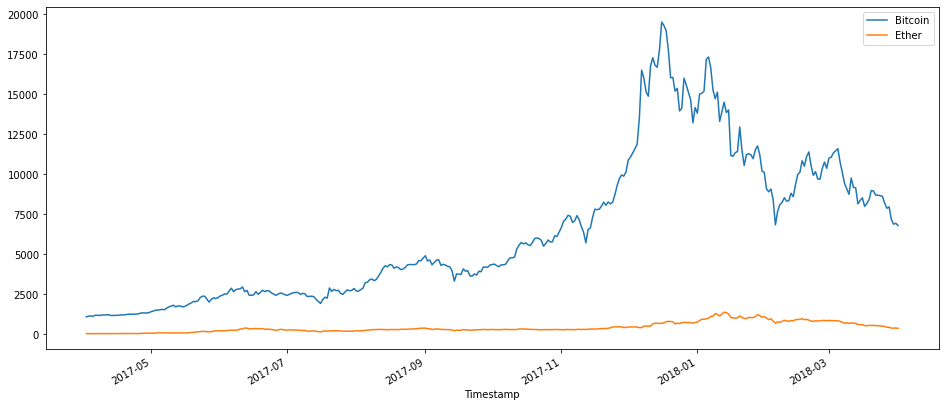

In [35]:
df[df['Bitcoin']<upper_limit].plot(figsize=(16,7))

<AxesSubplot:xlabel='Timestamp'>

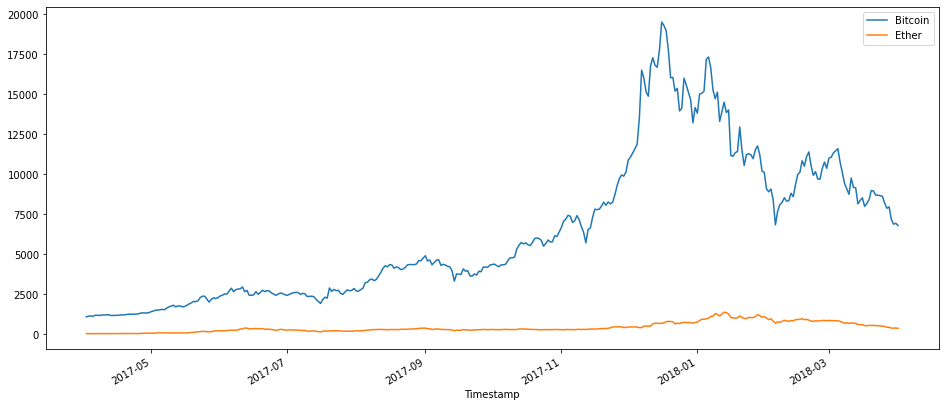

In [36]:
df.drop(df[df['Bitcoin']>upper_limit].index).plot(figsize=(16,7))